# **Import Modules**


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

#**Load the dataset**

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/speech-data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['/content/drive/MyDrive/Colab Notebooks/speech-data/YAF_pleasant_surprised/YAF_bean_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/speech-data/YAF_pleasant_surprised/YAF_base_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/speech-data/YAF_pleasant_surprised/YAF_chair_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/speech-data/YAF_pleasant_surprised/YAF_book_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/speech-data/YAF_pleasant_surprised/YAF_back_ps.wav']

In [5]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Colab Notebooks/speech-...,ps
1,/content/drive/MyDrive/Colab Notebooks/speech-...,ps
2,/content/drive/MyDrive/Colab Notebooks/speech-...,ps
3,/content/drive/MyDrive/Colab Notebooks/speech-...,ps
4,/content/drive/MyDrive/Colab Notebooks/speech-...,ps


In [7]:
df['label'].value_counts()

label
neutral    600
ps         400
happy      400
disgust    400
angry      400
sad        400
fear       200
Name: count, dtype: int64

# **Exploratory Data Analysist**

<Axes: xlabel='label', ylabel='count'>

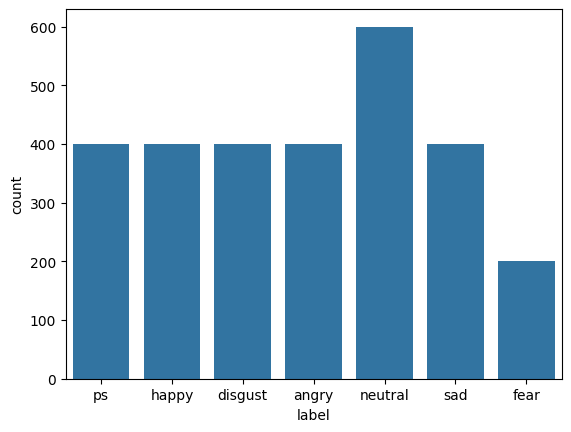

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

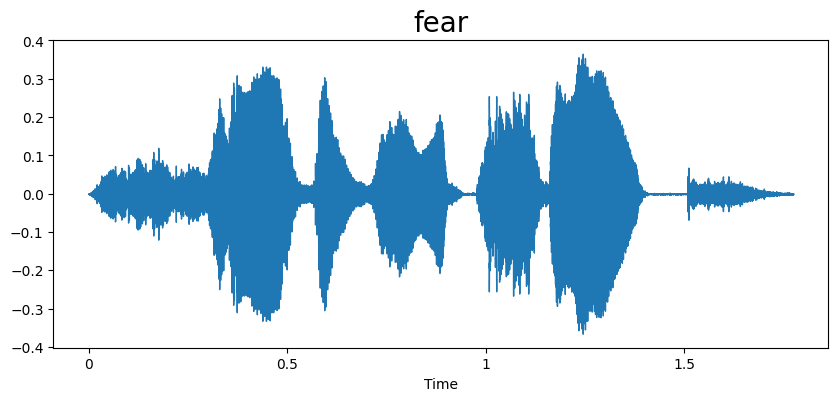

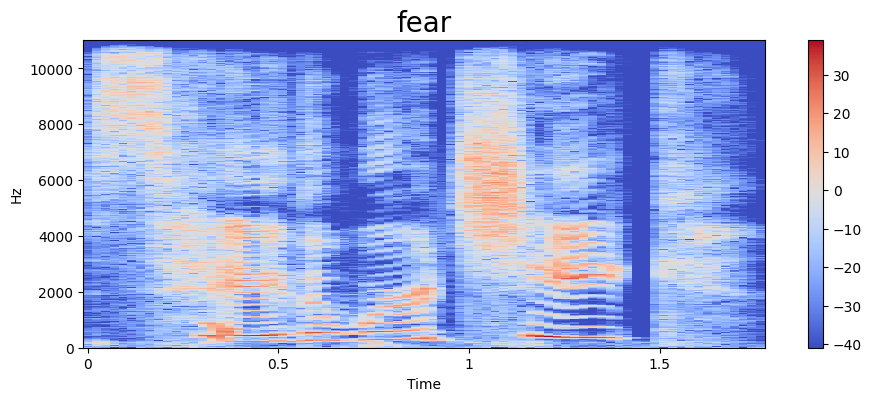

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

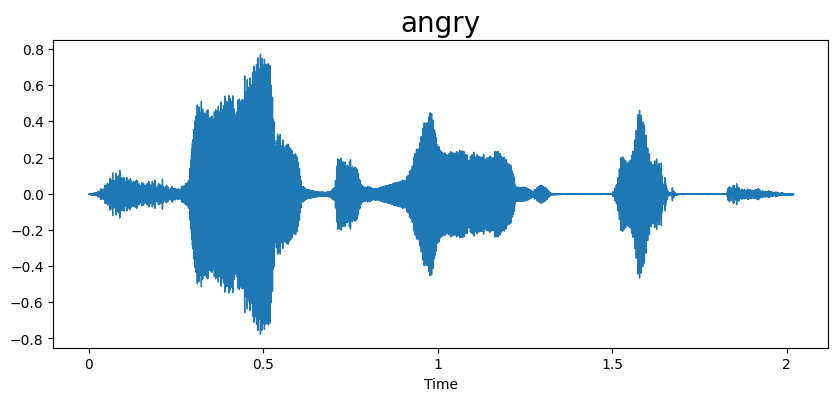

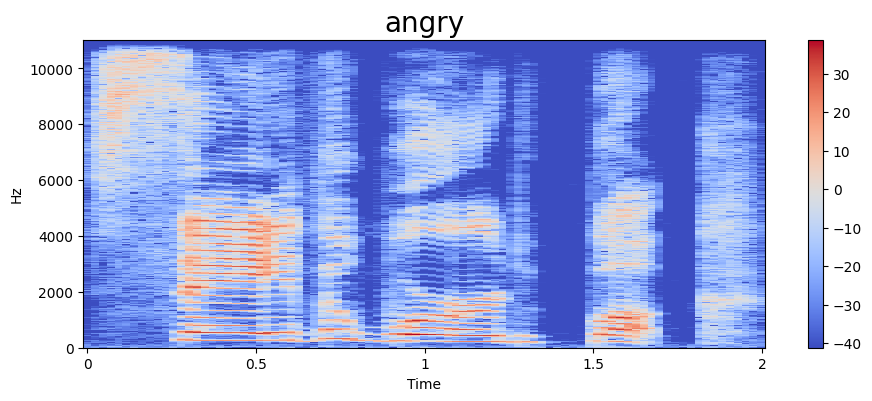

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

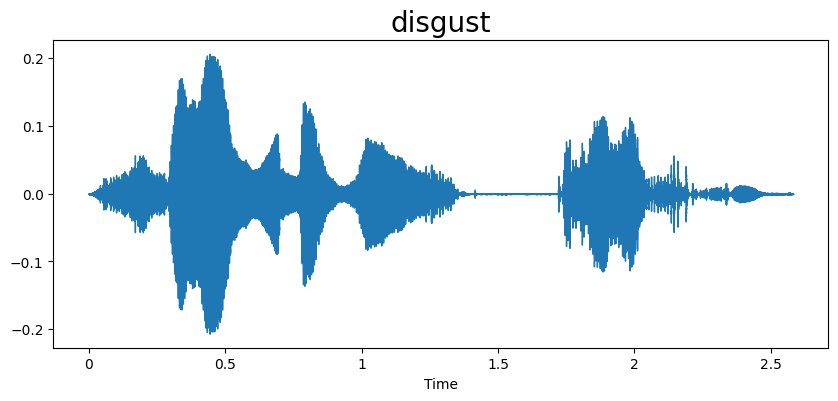

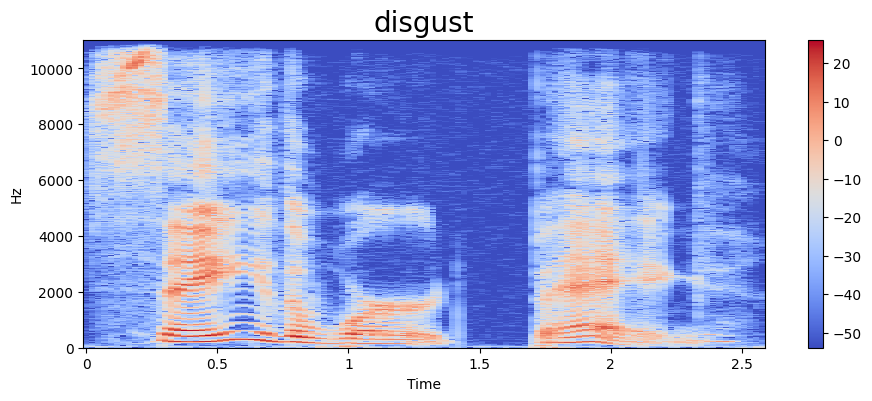

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

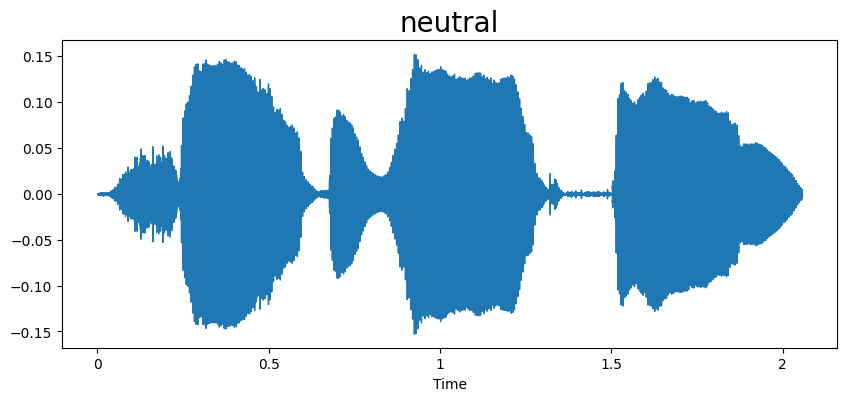

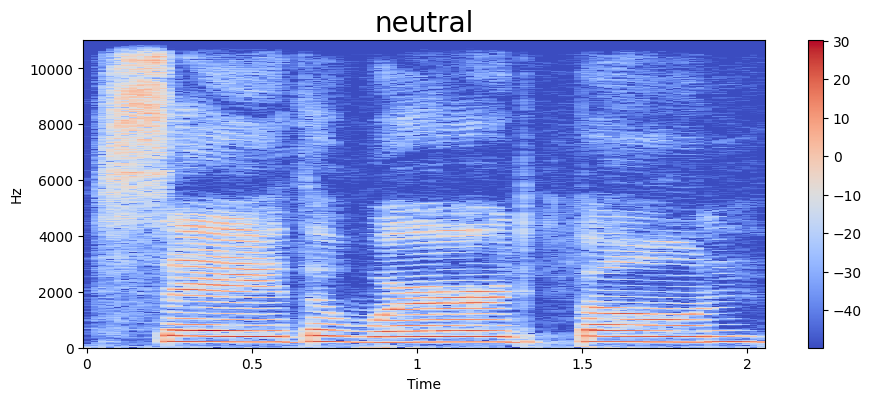

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

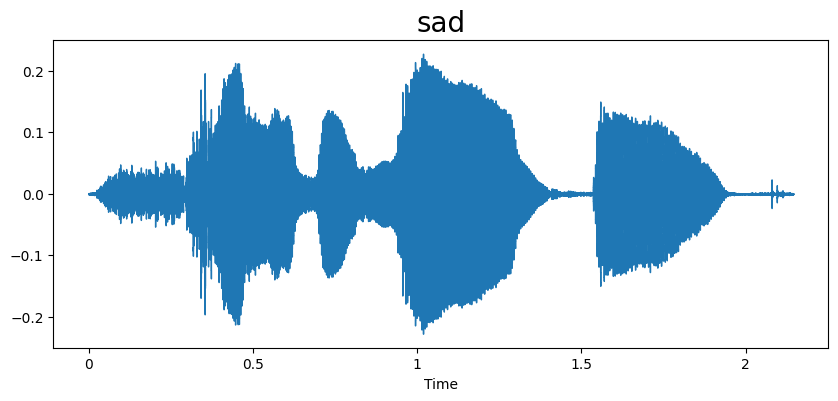

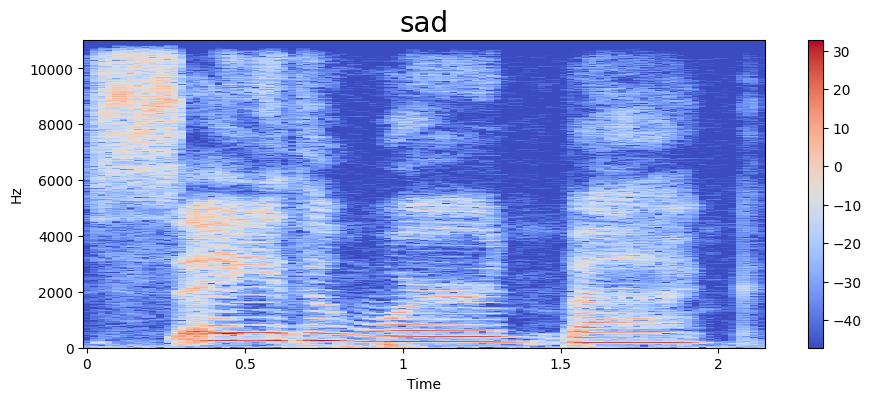

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

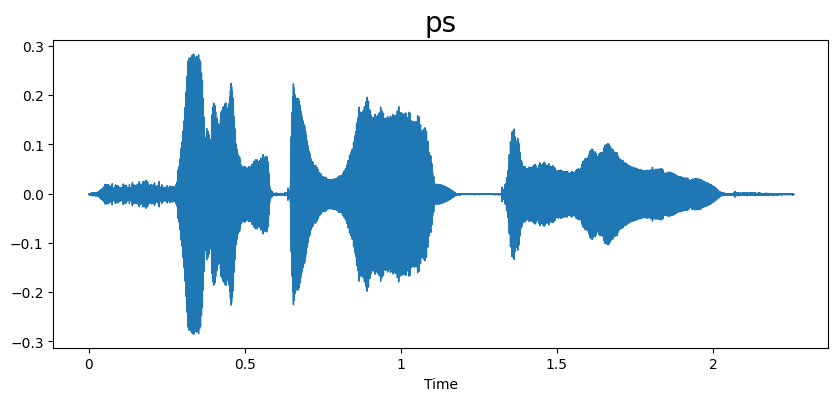

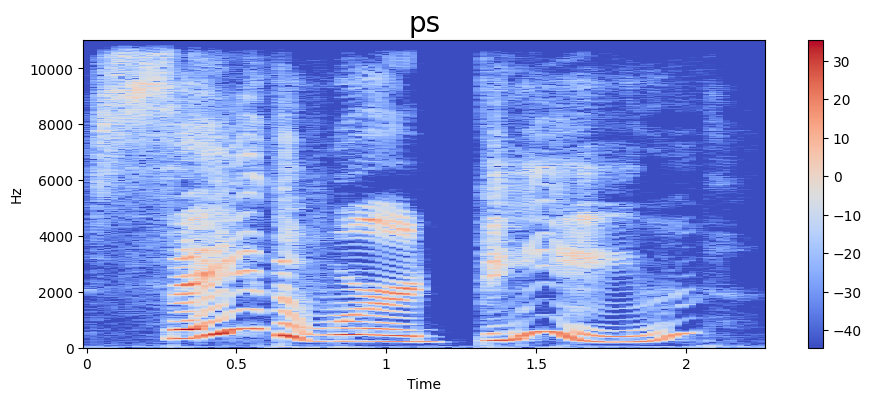

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

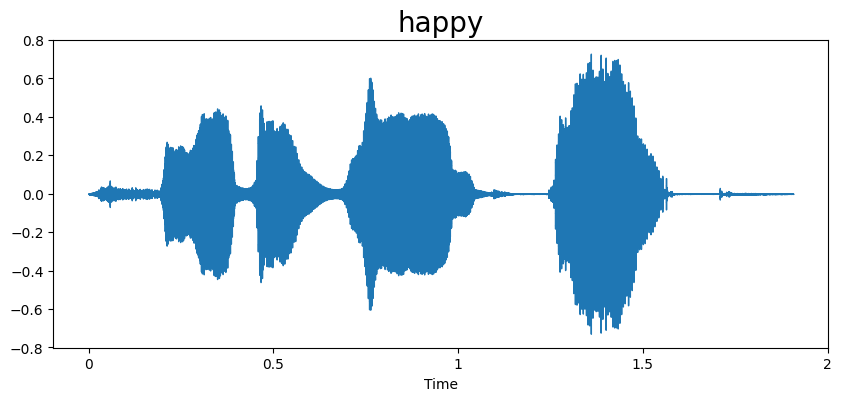

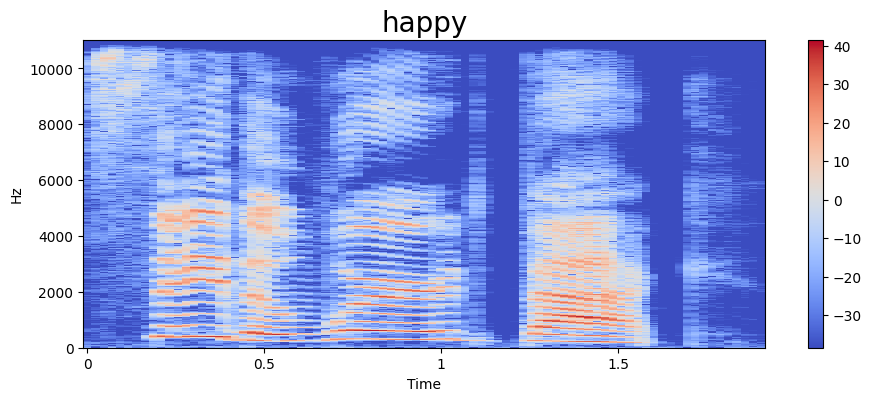

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.0578876e+02,  5.8404915e+01, -2.9496763e+00,  2.7836868e+01,
       -7.6394715e+00, -8.9249506e+00, -2.0104803e+01, -2.1935417e+01,
       -1.3573956e+01, -2.6248686e+00, -1.3334221e+01,  1.6059725e+00,
       -3.7218025e+00,  2.5494506e+00, -2.4288602e+00,  9.7873676e-01,
        6.4993887e+00,  3.0411443e-01, -7.7201395e+00,  6.2924027e+00,
       -5.7960877e+00,  1.0527350e+00, -3.6711209e+00,  9.6393365e-01,
        1.3672686e+00,  2.9694767e+00,  7.0652872e-02,  8.9177074e+00,
        7.4899139e+00,  1.2471884e+01,  1.0723027e+01,  1.7148592e+01,
        7.1818600e+00,  8.3530149e+00,  4.1582031e+00,  4.7758470e+00,
        1.3927509e+00,  9.8576385e-01,  1.1914821e+00, -3.0032396e-01],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-405.78876, 58.404915, -2.9496763, 27.836868,...
1       [-365.30927, 49.43276, 3.911189, 0.038419496, ...
2       [-343.54654, 65.37277, -20.684774, -3.4766371,...
3       [-391.19638, 80.00301, -17.48976, -1.6679263, ...
4       [-342.3485, 69.85261, -34.21661, -7.0165615, -...
                              ...                        
2795    [-441.35852, 95.35797, 3.8878899, 20.8181, -15...
2796    [-425.51337, 134.02647, -7.8821964, 2.3222773,...
2797    [-417.49307, 95.47916, 8.8922825, 24.799229, -...
2798    [-393.79233, 103.71699, -3.6320212, 21.343708,...
2799    [-455.23358, 98.44896, 6.681035, 25.266926, -3...
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)


**Create the LSTM Model**

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 12s 240ms/step - loss: 0.9389 - accuracy: 0.6817 - val_loss: 0.6256 - val_accuracy: 0.7536
Epoch 2/50
35/35 [==============================] - 6s 168ms/step - loss: 0.2247 - accuracy: 0.9348 - val_loss: 0.4088 - val_accuracy: 0.8625
Epoch 3/50
35/35 [==============================] - 8s 235ms/step - loss: 0.1090 - accuracy: 0.9679 - val_loss: 0.0637 - val_accuracy: 0.9786
Epoch 4/50
35/35 [==============================] - 6s 163ms/step - loss: 0.0812 - accuracy: 0.9786 - val_loss: 0.0586 - val_accuracy: 0.9804
Epoch 5/50
35/35 [==============================] - 8s 234ms/step - loss: 0.0895 - accuracy: 0.9741 - val_loss: 0.0847 - val_accuracy: 0.9732
Epoch 6/50
35/35 [==============================] - 6s 162ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.3366 - val_accuracy: 0.9054
Epoch 7/50
35/35 [==============================] - 8s 220ms/step - loss: 0.0496 - accuracy: 0.9875 - val_loss: 0.0237 - val_accuracy: 0.9929
Epoch

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## **Plot the results**

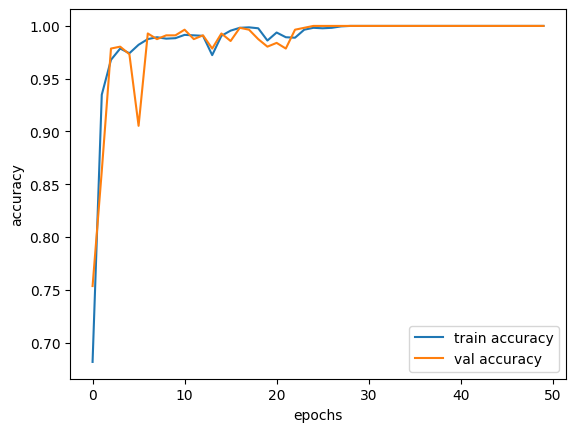

In [28]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

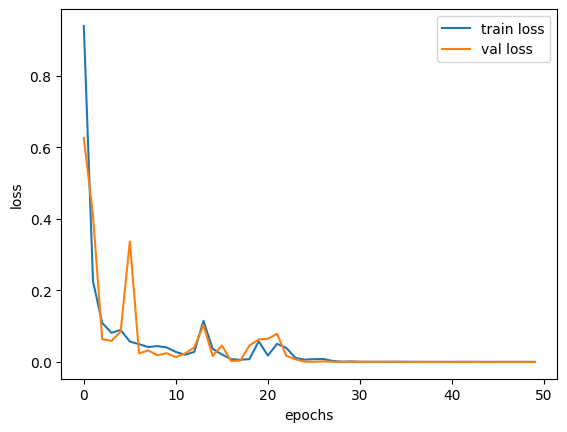

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()